### Problem Statement
### Analyze Acme Co.’s 2014–2018 sales data to identify key revenue and profit drivers across products,
#channels, and regions; uncover seasonal trends and outliers; and align performance against budgets.
#Use these insights to optimize pricing, promotions, and market expansion for sustainable growth and
#reduced concentration risk.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
sheets=pd.read_excel('/content/Regional Sales Dataset.xlsx',sheet_name=None)



In [ ]:
sheets

{'Sales Orders':         OrderNumber  OrderDate  Customer Name Index      Channel  \
 0       SO - 000225 2014-01-01                  126    Wholesale   
 1      SO - 0003378 2014-01-01                   96  Distributor   
 2      SO - 0005126 2014-01-01                    8    Wholesale   
 3      SO - 0005614 2014-01-01                   42       Export   
 4      SO - 0005781 2014-01-01                   73    Wholesale   
 ...             ...        ...                  ...          ...   
 64099  SO - 0007573 2018-02-28                   74    Wholesale   
 64100  SO - 0007706 2018-02-28                   51       Export   
 64101  SO - 0007718 2018-02-28                  136  Distributor   
 64102  SO - 0008084 2018-02-28                  158  Distributor   
 64103  SO - 0008654 2018-02-28                   22  Distributor   
 
       Currency Code Warehouse Code  Delivery Region Index  \
 0               USD         AXW291                    364   
 1               USD         A

In [ ]:
df_sales=sheets['Sales Orders']
df_customers=sheets['Customers']
df_products=sheets['Products']
df_state_reg=sheets['State Regions']
df_regions=sheets['Regions']
df_budgets=sheets['2017 Budgets']

In [ ]:
df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [ ]:
print("Sales Shape:",df_sales.shape)
print("Customers Shape:",df_customers.shape)
print("Products Shape:",df_products.shape)
print("State Regions Shape:",df_state_reg.shape)
print("Regions Shape:",df_regions.shape)
print("Budgets shape: ",df_budgets.shape)

Sales Shape: (64104, 12)
Customers Shape: (175, 2)
Products Shape: (30, 2)
State Regions Shape: (49, 3)
Regions Shape: (994, 15)
Budgets shape:  (30, 2)


In [ ]:
df_state_reg.head()

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [ ]:
# Promoting to headers
new_headers=df_state_reg.iloc[0]
df_state_reg=df_state_reg[1:].reset_index(drop=True)
df_state_reg.columns=new_headers
df_state_reg.head()

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [ ]:
# Checking for all the dataframes
df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [ ]:
df_budgets.head()

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [ ]:
df_customers.head()

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [ ]:
df_products.head()

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [ ]:
df_regions.head()

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [ ]:
df_sales.isnull().sum()

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [ ]:
df_regions.isnull().sum()

,0
id,0
name,0
county,0
state_code,0
state,0
type,0
latitude,0
longitude,0
area_code,0
population,0


In [ ]:
df_budgets.isnull().sum()

,0
Product Name,0
2017 Budgets,0


In [ ]:
df_customers.isnull().sum()

,0
Customer Index,0
Customer Names,0


In [ ]:
df_products.isnull().sum()

,0
Index,0
Product Name,0


In [ ]:
df_state_reg.isnull().sum()

,0
0,
State Code,0
State,0
Region,0


In [ ]:
df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


### "Data Cleaning and Wrangling"


In [ ]:
df= df_sales.merge(df_customers,how='left',left_on='Customer Name Index',right_on='Customer Index')\
.merge(df_products,how='left',left_on='Product Description Index',right_on='Index')\
.merge(df_regions,how='left',left_on='Delivery Region Index',right_on='id')
df.head()



,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [ ]:
# Merge with State Regions
df=df.merge(df_state_reg[['State Code','Region']],how='left',left_on='state_code',right_on='State Code')
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [ ]:
# merge with budgets
df=df.merge(df_budgets,how='left',on='Product Name')
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast,1085037.329


In [ ]:
df.columns

Index(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost', 'Customer Index', 'Customer Names',
       'Index', 'Product Name', 'id', 'name', 'county', 'state_code', 'state',
       'type', 'latitude', 'longitude', 'area_code', 'population',
       'households', 'median_income', 'land_area', 'water_area', 'time_zone',
       'State Code', 'Region', '2017 Budgets'],
      dtype='object')

In [ ]:
df.shape

(64104, 34)

In [ ]:
cols_to_drop=["Customer Index","Index","id","State Code"]
df.drop(cols_to_drop,axis=1,errors='ignore',inplace=True)
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [ ]:
df.columns

Index(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost', 'Customer Names', 'Product Name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households', 'median_income',
       'land_area', 'water_area', 'time_zone', 'Region', '2017 Budgets'],
      dtype='object')

In [ ]:
df.shape

(64104, 30)

In [ ]:
# Conver all the columns to lower case
df.columns=df.columns.str.lower()

In [ ]:
df.head(5)

,ordernumber,orderdate,customer name index,channel,currency code,warehouse code,delivery region index,product description index,order quantity,unit price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,region,2017 budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [ ]:
df.columns

Index(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households', 'median_income',
       'land_area', 'water_area', 'time_zone', 'region', '2017 budgets'],
      dtype='object')

In [ ]:
cols_to_keep=[
    'ordernumber',
    'orderdate',
    'customer names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'county',
    'state',
    'region',
    'latitude',
    'longitude',
    '2017 budgets'

]
df=df[cols_to_keep]
df.head()


,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [ ]:
df.columns

Index(['ordernumber', 'orderdate', 'customer names', 'channel', 'product name',
       'order quantity', 'unit price', 'line total', 'total unit cost',
       'state_code', 'county', 'state', 'region', 'latitude', 'longitude',
       '2017 budgets'],
      dtype='object')

In [ ]:
df.shape

(64104, 16)

In [ ]:
df=df.rename(columns={
    'ordernumber':'order_number',
    'orderdate':'order_date',
    'customer names':'customer_name',
    'channel':'channel',
    'product name':'product_name',
    'order quantity':'order_quantity',
    'unit price':'unit_price',
    'line total':'revenue',
    'total unit cost':'total_unit_cost',
    'state_code':'state_code',
    'county':'county',
    'state':'state',
    'region':'region',
    'latitude':'latitude',
    'longitude':'longitude',
    '2017 budgets':'budget'
})
df.head()


,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state_code,county,state,region,latitude,longitude,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [ ]:
# Blank out budgets for non 2017 budgets as budget is mentioned only for 2k17
df.loc[df['order_date'].dt.year !=2017,'budget']=pd.NA

df[['order_date','product_name','revenue','budget']].head()

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN


In [ ]:
df[['order_date','product_name','revenue','budget']].tail()

,order_date,product_name,revenue,budget
64099,2018-02-28,Product 26,21788.4,NaN
64100,2018-02-28,Product 21,5185.8,NaN
64101,2018-02-28,Product 13,43483.0,NaN
64102,2018-02-28,Product 20,27717.9,NaN
64103,2018-02-28,Product 15,7986.4,NaN


In [ ]:
df.to_csv('final.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_number     64104 non-null  object        
 1   order_date       64104 non-null  datetime64[ns]
 2   customer_name    64104 non-null  object        
 3   channel          64104 non-null  object        
 4   product_name     64104 non-null  object        
 5   order_quantity   64104 non-null  int64         
 6   unit_price       64104 non-null  float64       
 7   revenue          64104 non-null  float64       
 8   total_unit_cost  64104 non-null  float64       
 9   state_code       64104 non-null  object        
 10  county           64104 non-null  object        
 11  state            64104 non-null  object        
 12  region           64104 non-null  object        
 13  latitude         64104 non-null  float64       
 14  longitude        64104 non-null  float

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_number     64104 non-null  object        
 1   order_date       64104 non-null  datetime64[ns]
 2   customer_name    64104 non-null  object        
 3   channel          64104 non-null  object        
 4   product_name     64104 non-null  object        
 5   order_quantity   64104 non-null  int64         
 6   unit_price       64104 non-null  float64       
 7   revenue          64104 non-null  float64       
 8   total_unit_cost  64104 non-null  float64       
 9   state_code       64104 non-null  object        
 10  county           64104 non-null  object        
 11  state            64104 non-null  object        
 12  region           64104 non-null  object        
 13  latitude         64104 non-null  float64       
 14  longitude        64104 non-null  float

In [ ]:
df_2017=df[df['order_date'].dt.year==2017]
df_2017.head()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state_code,county,state,region,latitude,longitude,budget
46363,SO - 0002544,2017-01-01,NCS Group,Wholesale,Product 30,6,1239.5,7437.0,1028.785,NJ,Hudson County,New Jersey,Northeast,40.77955,-74.02375,1011609.684
46364,SO - 0006431,2017-01-01,Epic Group,Wholesale,Product 13,5,1829.1,9145.5,1207.206,CO,Mesa County,Colorado,West,39.06387,-108.55065,3720639.645
46365,SO - 0007491,2017-01-01,State Ltd,Wholesale,Product 15,9,2412.0,21708.0,1664.280,CA,Los Angeles County,California,West,33.96168,-118.35313,3299478.315
46366,SO - 0008741,2017-01-01,Fivebridge Ltd,Wholesale,Product 8,8,904.5,7236.0,750.735,IA,Dubuque County,Iowa,Midwest,42.50056,-90.66457,1085037.329
46367,SO - 0009295,2017-01-01,Tagfeed Ltd,Wholesale,Product 2,12,1112.2,13346.4,811.906,FL,Hernando County,Florida,South,28.47689,-82.52546,3050087.565


In [ ]:
df_2017.isnull().sum()

,0
order_number,0
order_date,0
customer_name,0
channel,0
product_name,0
order_quantity,0
unit_price,0
revenue,0
total_unit_cost,0
state_code,0


In [ ]:
df_2017.shape

(15263, 16)

# Feature Engineering

In [ ]:
df.head()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state_code,county,state,region,latitude,longitude,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN


In [ ]:
df['total_cost']=df['order_quantity']*df['total_unit_cost']
df.head()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state_code,county,state,region,latitude,longitude,budget,total_cost
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160


In [ ]:
df['total_profit']=df['revenue']-df['total_cost']
df.head()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state_code,county,state,region,latitude,longitude,budget,total_cost,total_profit
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040


In [ ]:
df['profit_margin_pct']=df['total_profit']/df['revenue']*100
df.head()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state_code,county,state,region,latitude,longitude,budget,total_cost,total_profit,profit_margin_pct
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0


## Exploratory Data Analysis

## 1.Monthly Sales Trend Over Time

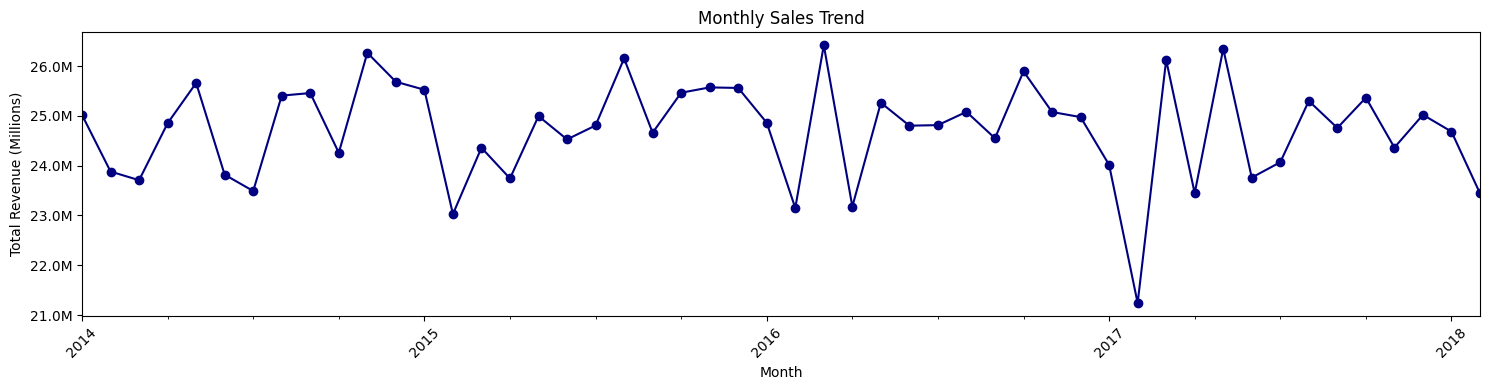

In [ ]:


# Convert order_date to monthly period (e.g., 2022-01, 2022-02)
df['order_month'] = df['order_date'].dt.to_period('M')

# Calculate total revenue for each month
monthly_sales = df.groupby('order_month')['revenue'].sum()

# Set figure size for clarity
plt.figure(figsize=(15,4))

# Plot the monthly sales trend with circle markers and navy line
monthly_sales.plot(marker='o', color='navy')

# Scale y-axis values to millions for readability
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Add title and axis labels
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

In [ ]:
df.dtypes

,0
order_number,object
order_date,datetime64[ns]
customer_name,object
channel,object
product_name,object
order_quantity,int64
unit_price,float64
revenue,float64
total_unit_cost,float64
state_code,object


## 2.Monthly Sales Trend all years combined

In [ ]:


# 1. Filter out any 2018 orders
df_ = df[df['order_date'].dt.year != 2018]   # exclude any partial-year data (i.e., January and February of 2018) so that the monthly totals aren’t skewed by an incomplete year.
                                            #I create df_ so I don’t alter the original df, preserving it intact for other analyses while filtering just for this chart.

# geting the month names and month numbers

df['month_name']=df['order_date'].dt.month_name()
df['month_num']=df['order_date'].dt.month


# 2. Group by month number and month name, sum revenue, then sort by month number
monthly_sales = (
    df_
    .groupby(['month_num','month_name'])['revenue']
    .sum()
    .sort_index()
)

# 3. Plot setup
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(13, 4))
plt.plot(
    monthly_sales.index.get_level_values(1),  # X-axis: month names
    monthly_sales.values,                     # Y-axis: total revenue
    marker='o',                                # circle markers
    color='navy'                               # line color
)

# 4. Scale y-axis values to millions for readability
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# 5. Add title and axis labels
plt.title('Overall Monthly Sales Trend (Excluding 2018)')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

# 6. Rotate x-axis labels for readability
plt.xticks(rotation=45)

# 7. Adjust layout to prevent clipping
plt.tight_layout()
plt.grid(True)

# 8. Display the plot
plt.show()




KeyError: 'month_num'

## 3.Top 10 Products By Revenue

In [ ]:
df_top_10_products=df.groupby('product_name')['revenue'].sum()/1000000
top_10=df_top_10_products.sort_values(ascending=False).head(10)  ## or top_10=df_top_1-_products.nlargest(10)
top_10

,revenue
product_name,
Product 26,117.291821
Product 25,109.473967
Product 13,78.281380
Product 14,75.390397
Product 5,70.804381
Product 15,67.331623
Product 2,57.401098
Product 4,56.701537
Product 1,55.952290


/tmp/ipython-input-52-1626107783.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


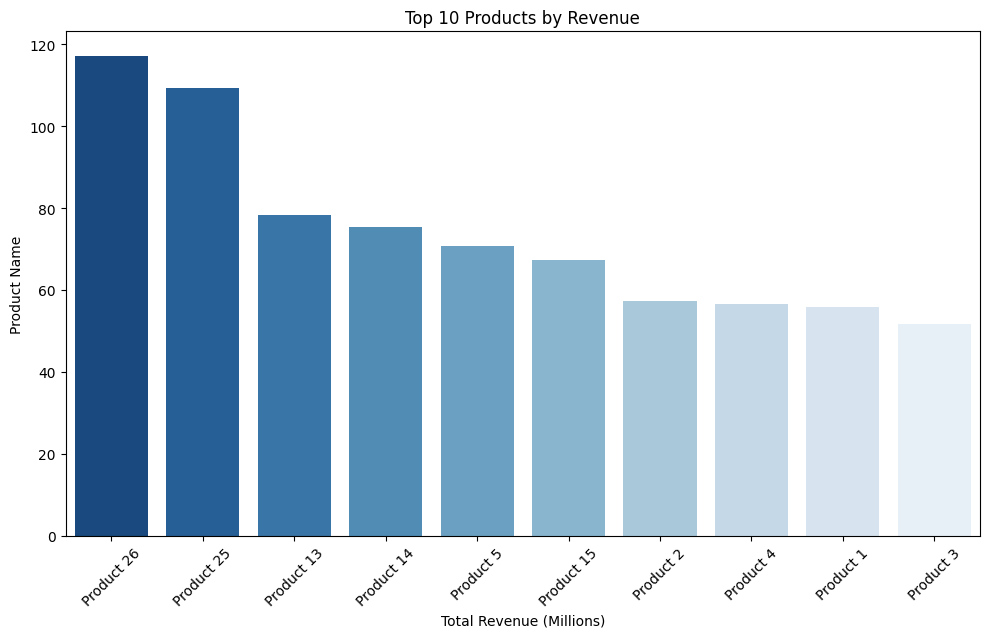

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(
    x=top_10.index,
    y=top_10.values,
    palette='Blues_r'
)

plt.xlabel('Total Revenue (Millions)')
plt.ylabel('Product Name')
plt.title('Top 10 Products by Revenue')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

## 4.Bottom 20 products

In [ ]:
df_bottom_20_products=df.groupby('product_name')['revenue'].sum()/1000000
btm_20=df_bottom_20_products.sort_values(ascending=True).head(20)
btm_20

,revenue
product_name,
Product 24,14.555053
Product 9,14.598630
Product 29,15.311014
Product 22,15.638202
Product 7,17.058267
Product 10,17.660584
Product 27,18.377792
Product 30,18.590168
Product 23,18.856855


/tmp/ipython-input-54-302367138.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


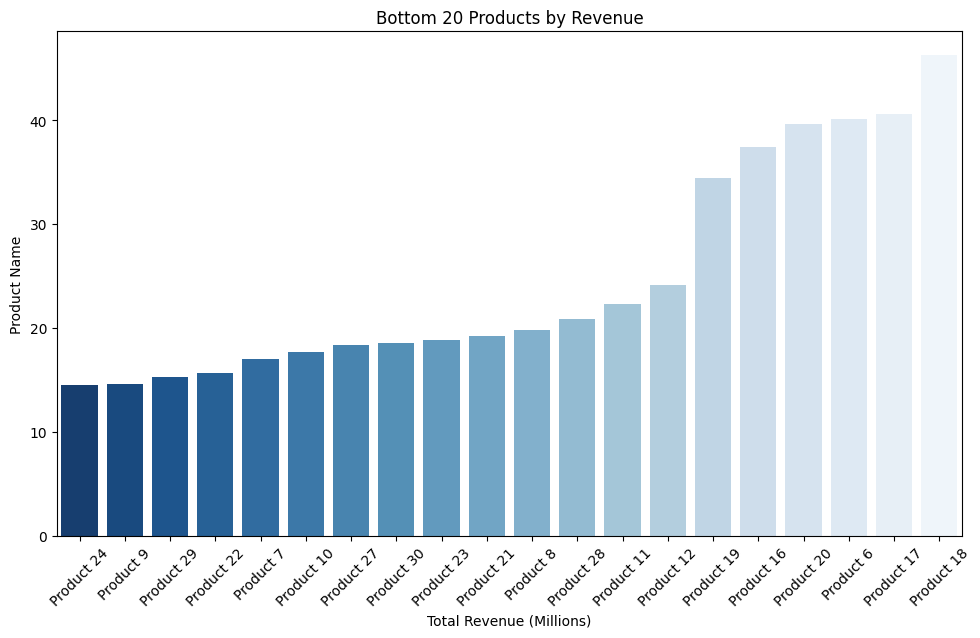

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(
    x=btm_20.index,
    y=btm_20.values,
    palette='Blues_r'
)

plt.title('Bottom 20 Products by Revenue')
plt.xlabel('Total Revenue (Millions)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [ ]:
df.head()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state_code,...,region,latitude,longitude,budget,total_cost,total_profit,profit_margin_pct,order_month,month_name,month_num
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,2014-01,January,1
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,2014-01,January,1
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,2014-01,January,1
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,...,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,2014-01,January,1
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,...,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,2014-01,January,1


## 5.Top 10 products by Average profit


In [ ]:
df_top_10_avg_profit=df.groupby('product_name')['total_profit'].mean()/1000000
df_top_10_avg_profit.sort_values(ascending=False).head(10)
df_top_10_avg_profit=df_top_10_avg_profit.nlargest(10)
df_top_10_avg_profit

,total_profit
product_name,
Product 18,0.008531
Product 28,0.008140
Product 5,0.007940
Product 11,0.007906
Product 12,0.007583
Product 26,0.007491
Product 21,0.007458
Product 4,0.007396
Product 16,0.007393


/tmp/ipython-input-57-1174035235.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


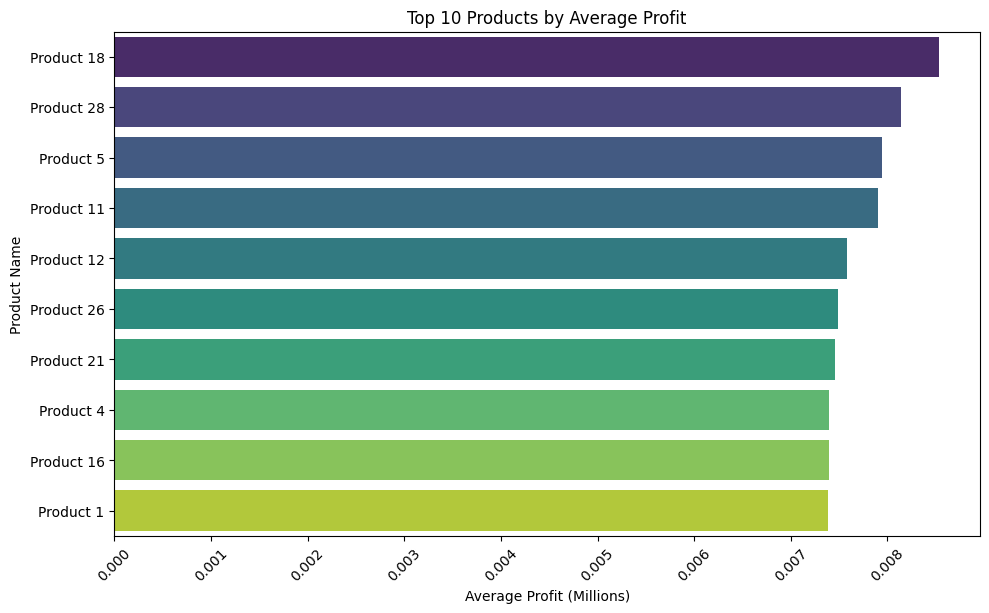

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(
    x=df_top_10_avg_profit.values,
    y=df_top_10_avg_profit.index,
    palette='viridis'
)

plt.title('Top 10 Products by Average Profit')
plt.xlabel('Average Profit (Millions)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['channel'].unique()

array(['Wholesale', 'Distributor', 'Export'], dtype=object)

## 6.Sales By Channel


In [ ]:
df_sales_by_channel=df.groupby('channel')['revenue'].sum()
df_sales_by_channel

,revenue
channel,
Distributor,387139788.6
Export,180631866.0
Wholesale,668197244.4


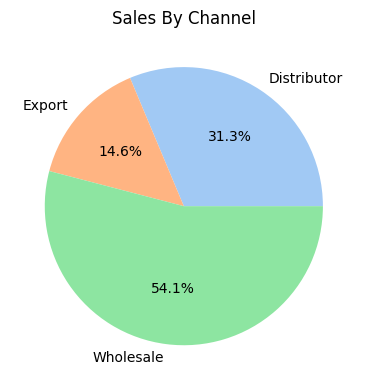

In [ ]:
plt.figure(figsize=(9,4))

plt.pie(df_sales_by_channel.values,
        labels=df_sales_by_channel.index,
        colors=sns.color_palette('pastel')[0:5],
        autopct='%1.1f%%',
        )

plt.title('Sales By Channel')
plt.tight_layout()
plt.show()

## 7.Average Order Value Distribution (AOV)

In [ ]:
df_aov=df.groupby('order_number')['revenue'].sum()/1e6
df_aov.head()

,revenue
order_number,
SO - 0001000,0.038592
SO - 0001001,0.008362
SO - 0001002,0.347127
SO - 0001003,0.195372
SO - 0001004,0.081686


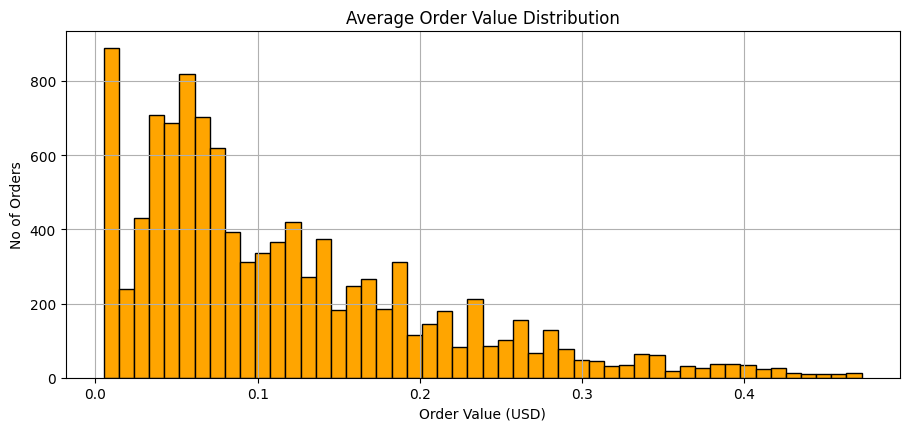

In [ ]:
plt.figure(figsize=(9,4))

plt.hist(
    df_aov.values,
    bins=50,
    color='orange',
    edgecolor='black'

)

plt.tight_layout()
plt.xlabel('Order Value (USD)')
plt.ylabel('No of Orders')
plt.title('Average Order Value Distribution')
plt.grid(True)
plt.show()

## 8.Profit Margin % Vs Unit Price

In [ ]:
df.head()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state_code,...,region,latitude,longitude,budget,total_cost,total_profit,profit_margin_pct,order_month,month_name,month_num
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,2014-01,January,1
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,2014-01,January,1
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,2014-01,January,1
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,...,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,2014-01,January,1
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,...,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,2014-01,January,1


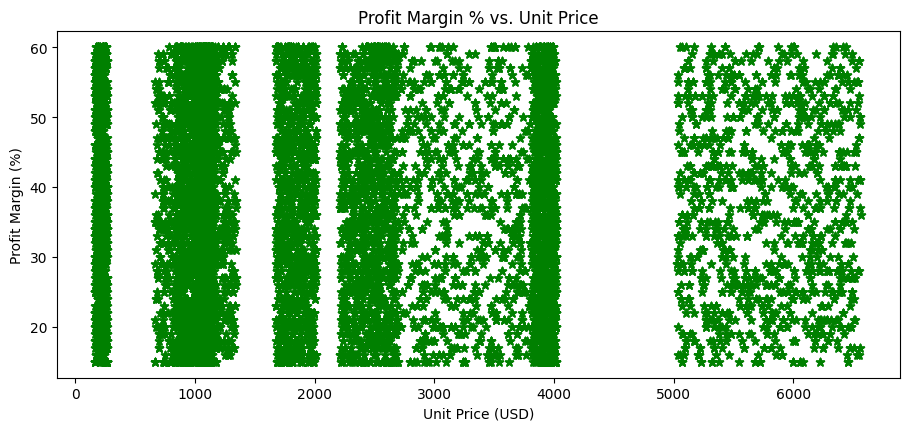

In [ ]:
plt.figure(figsize=(9,4))

plt.scatter(
    x=df['unit_price'],
    y=df['profit_margin_pct'],
    alpha= 0.6,  # transparecny level for overlapping points
    marker='*',
    color='green'
)
plt.tight_layout()

plt.title('Profit Margin % vs. Unit Price')  # Chart title
plt.xlabel('Unit Price (USD)')                # X-axis label
plt.ylabel('Profit Margin (%)')
plt.show()

## 9.Unit Price Distribution per Product

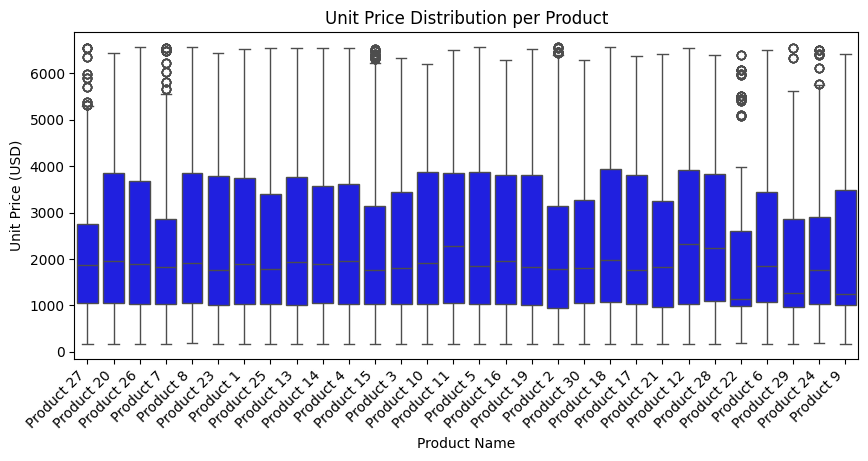

In [ ]:
plt.figure(figsize=(9,4))

sns.boxplot(
    data=df,
    x='product_name',
    y='unit_price',
    color='blue',

)

plt.tight_layout()
plt.xticks(rotation=45,ha='right')
plt.xlabel('Product Name')
plt.ylabel('Unit Price (USD)')
plt.title('Unit Price Distribution per Product')
plt.show()

## 10.Total Sales By US Region

In [ ]:
df.head()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state_code,...,region,latitude,longitude,budget,total_cost,total_profit,profit_margin_pct,order_month,month_name,month_num
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,2014-01,January,1
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,2014-01,January,1
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,2014-01,January,1
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,...,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,2014-01,January,1
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,...,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,2014-01,January,1


In [ ]:
df.columns

Index(['order_number', 'order_date', 'customer_name', 'channel',
       'product_name', 'order_quantity', 'unit_price', 'revenue',
       'total_unit_cost', 'state_code', 'county', 'state', 'region',
       'latitude', 'longitude', 'budget', 'total_cost', 'total_profit',
       'profit_margin_pct', 'order_month', 'month_name', 'month_num'],
      dtype='object')

In [ ]:
df.region

,region
0,South
1,Midwest
2,West
3,Midwest
4,Northeast
...,...
64099,Northeast
64100,Midwest
64101,South
64102,Northeast


In [ ]:
df_us_region=df.groupby('region')['revenue'].sum()/1e6
df_us_region

,revenue
region,
Midwest,320.322364
Northeast,208.369216
South,335.135012
West,372.142308


/tmp/ipython-input-70-96126651.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


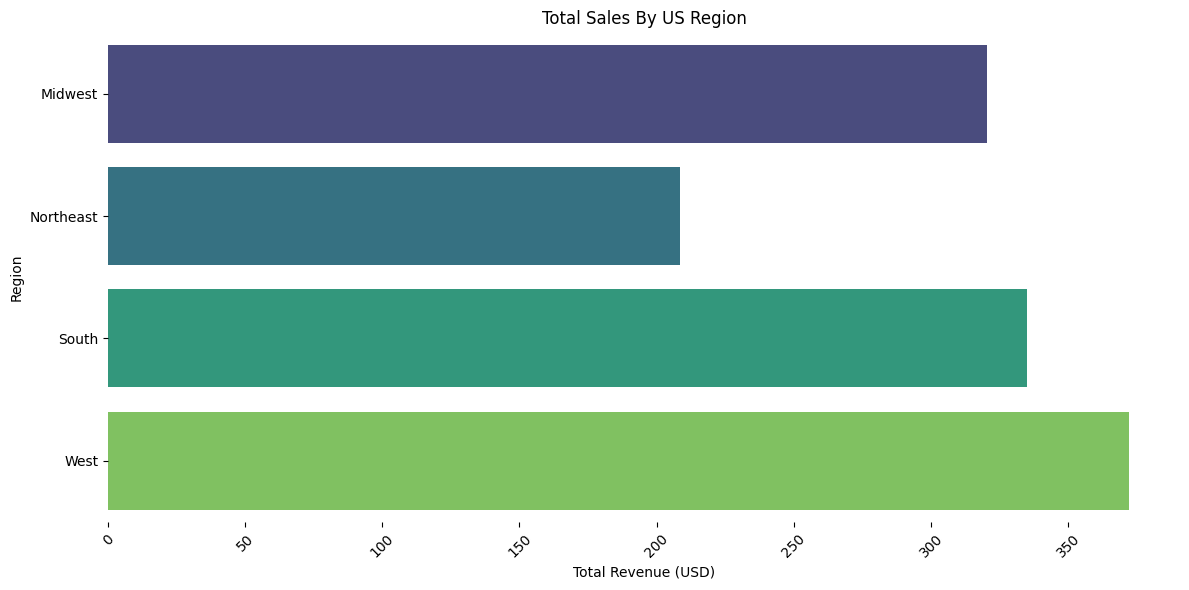

In [ ]:
plt.figure(figsize=(12,6))

sns.barplot(
    x=df_us_region.values,
    y=df_us_region.index,
    palette='viridis'
)

plt.xticks(rotation=45)
plt.xlabel('Total Revenue (USD)')
plt.ylabel('Region')
plt.title('Total Sales By US Region')
plt.tight_layout()
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:
df['order_number']

,order_number
0,SO - 000225
1,SO - 0003378
2,SO - 0005126
3,SO - 0005614
4,SO - 0005781
...,...
64099,SO - 0007573
64100,SO - 0007706
64101,SO - 0007718
64102,SO - 0008084


## 11.Total Sales by State (Choropleth Map)

In [ ]:
import plotly.express as px

state_sales=df.groupby('state')['revenue'].sum()/1e6
state_sales.head()

,revenue
state,
Alabama,10.697649
Arizona,23.388246
Arkansas,9.754691
California,228.785436
Colorado,27.683777


In [ ]:
# 1. Aggregate revenue by state (in millions)
state_sales = (
    df
    .groupby('state')['revenue']
    .sum()
    .reset_index()
)
state_sales['revenue_m'] = state_sales['revenue'] / 1e6  # convert to millions

# 2. Plotly choropleth
fig = px.choropleth(
    state_sales,
    locations='state',            # column with state codes
    locationmode='USA-states',    # tells Plotly these are US states
    color='revenue_m',
    scope='usa',
    labels={'revenue_m':'Total Sales (M USD)'},
    color_continuous_scale='Blues',
    hover_data={'revenue_m':':.2f'}  # show 2 decimals
)

# 3. Layout tuning
fig.update_layout(
    title_text='Total Sales by State',
    margin=dict(l=0, r=0, t=40, b=0),
    coloraxis_colorbar=dict(
        title='Sales (M USD)',
        ticksuffix='M'
    )
)

fig.show()


## 12.Top 10 States by Revenue and Order Count

In [ ]:
# Top revenue producing states
top_rev=df.groupby('state')['revenue'].sum()/1e6
top_rev=top_rev.nlargest(10)
top_rev

,revenue
state,
California,228.785436
Illinois,111.050966
Florida,90.204679
Texas,84.011903
New York,55.534960
Indiana,54.601690
New Jersey,46.830956
Connecticut,44.251229
Michigan,39.025316


In [ ]:
# Extract the number from 'order_number' and convert to integer
df['order_number_int'] = df['order_number'].str.extract(r'(\d+)').astype(int)

# Count the occurrences of each order number
top_orders = df.groupby('state')['order_number_int'].count()

# Get the top 10 order numbers by count
top_orders = top_orders.nlargest(10)
top_orders

,order_number_int
state,
California,12000
Illinois,5682
Florida,4601
Texas,4289
Indiana,2830
New York,2829
New Jersey,2378
Connecticut,2264
Michigan,2039


/tmp/ipython-input-76-133236690.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-76-133236690.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




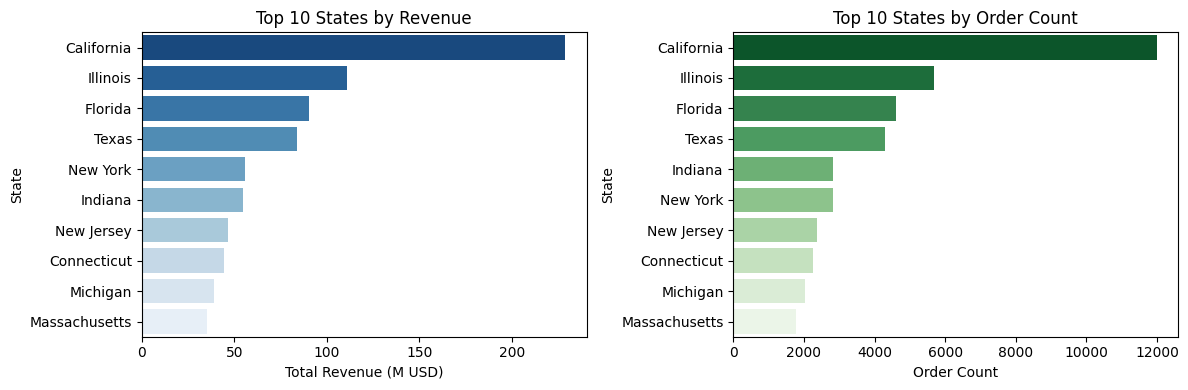

In [ ]:
fig,axes=plt.subplots(1,2, figsize=(12,4))


sns.barplot(
    x=top_rev.values,
    y=top_rev.index,
    palette='Blues_r',
    ax=axes[0]
)

sns.barplot(
    x=top_orders.values,
    y=top_orders.index,
    palette='Greens_r',
    ax=axes[1]
)

axes[0].set_xlabel('Total Revenue (M USD)')
axes[0].set_ylabel('State')
axes[0].set_title('Top 10 States by Revenue')

axes[1].set_xlabel('Order Count')
axes[1].set_ylabel('State')
axes[1].set_title('Top 10 States by Order Count')

plt.tight_layout()
plt.show()


## 13.Top 10 and Bottom 10 Customers by Revenue

In [ ]:
df_top10_cust_revenue=df.groupby('customer_name')['revenue'].sum()/1e6
df_top10_cust_revenue=df_top10_cust_revenue.nlargest(10)
df_top10_cust_revenue

,revenue
customer_name,
Aibox Company,12.641252
State Ltd,12.220639
Pixoboo Corp,10.986459
Organon Corp,10.955827
Realbuzz Ltd,10.753299
WOCKHARDT Group,10.701964
Kare Corp,10.635634
Colgate-Pa Group,10.107004
Golden Corp,10.007669


In [ ]:
df_btm10_cust_revenue=df.groupby('customer_name')['revenue'].sum()/1e6
df_btm10_cust_revenue=df_btm10_cust_revenue.nsmallest(10)
df_btm10_cust_revenue

,revenue
customer_name,
BB17 Company,4.034673
Yodoo Ltd,4.372755
Mycone Ltd,4.534238
Voonyx Group,4.670918
SEINDNI Corp,4.760162
Epic Group,4.807960
Quaxo Ltd,5.026206
Aveda Group,5.037100
Zoomdog Corp,5.047914


/tmp/ipython-input-79-1683928204.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-79-1683928204.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




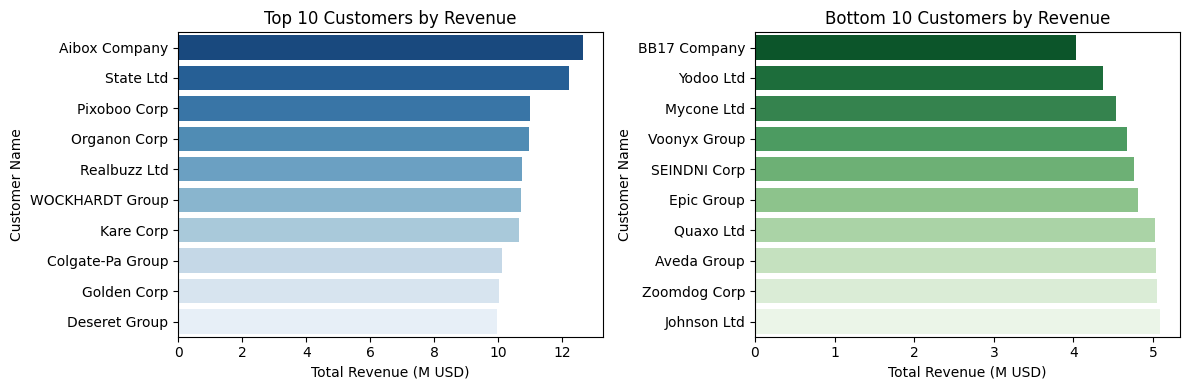

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(12,4))

sns.barplot(
    x=df_top10_cust_revenue.values,
    y=df_top10_cust_revenue.index,
    palette='Blues_r',
    ax=axes[0]
)

sns.barplot(
    x=df_btm10_cust_revenue.values,
    y=df_btm10_cust_revenue.index,
    palette='Greens_r',
    ax=axes[1]
)

axes[0].set_xlabel('Total Revenue (M USD)')
axes[0].set_ylabel('Customer Name')
axes[0].set_title('Top 10 Customers by Revenue')

axes[1].set_xlabel('Total Revenue (M USD)')
axes[1].set_ylabel('Customer Name')
axes[1].set_title('Bottom 10 Customers by Revenue')

plt.tight_layout()
plt.show()

## 14.Average Profit Margin by Channel

In [ ]:
df_avg_pft_channel=df.groupby('channel')['profit_margin_pct'].mean()
df_avg_pft_channel=df_avg_pft_channel.round(2).sort_values(ascending=False)
df_avg_pft_channel

,profit_margin_pct
channel,
Export,37.93
Distributor,37.56
Wholesale,37.09


/tmp/ipython-input-81-4228914926.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




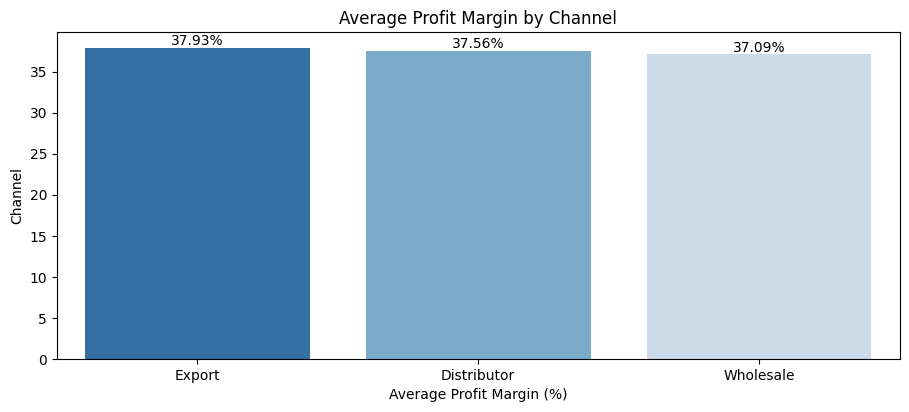

In [ ]:
plt.figure(figsize=(9,4))

ax=sns.barplot(
    x=df_avg_pft_channel.index,
    y=df_avg_pft_channel.values,
    palette='Blues_r'
)

for i,value in enumerate(df_avg_pft_channel):
  ax.text(i,value +0.3,f'{value:.2f}%',ha='center')

plt.tight_layout()
plt.xlabel('Average Profit Margin (%)')
plt.ylabel('Channel')
plt.title('Average Profit Margin by Channel')
plt.show()

## 14. Customer Segmentation: Revenue vs. Profit Margin

In [ ]:
df.columns

Index(['order_number', 'order_date', 'customer_name', 'channel',
       'product_name', 'order_quantity', 'unit_price', 'revenue',
       'total_unit_cost', 'state_code', 'county', 'state', 'region',
       'latitude', 'longitude', 'budget', 'total_cost', 'total_profit',
       'profit_margin_pct', 'order_month', 'month_name', 'month_num',
       'order_number_int'],
      dtype='object')

In [ ]:
df_cust_segment=df.groupby('customer_name').agg(
    total_revenue=('revenue','sum'),
    total_profit=('total_profit','sum'),
    avg_profit_margin=('profit_margin_pct','mean'),
    orders=('order_number','nunique')
).reset_index()
df_cust_segment.head()

,customer_name,total_revenue,total_profit,avg_profit_margin,orders
0,ALK-Abello Ltd,7662321.0,2956715.226,38.223881,67
1,Accord Group,7116927.6,2828208.288,37.945455,55
2,Accudial Company,5835994.8,2108456.634,36.983607,61
3,Actavis Company,7074074.4,2863854.834,38.761905,63
4,Aibox Company,12641251.8,4946556.936,37.860465,86


In [ ]:
df_cust_segment['revenue_m']=df_cust_segment['total_revenue']/1e6
df_cust_segment.head()

,customer_name,total_revenue,total_profit,avg_profit_margin,orders,revenue_m
0,ALK-Abello Ltd,7662321.0,2956715.226,38.223881,67,7.662321
1,Accord Group,7116927.6,2828208.288,37.945455,55,7.116928
2,Accudial Company,5835994.8,2108456.634,36.983607,61,5.835995
3,Actavis Company,7074074.4,2863854.834,38.761905,63,7.074074
4,Aibox Company,12641251.8,4946556.936,37.860465,86,12.641252


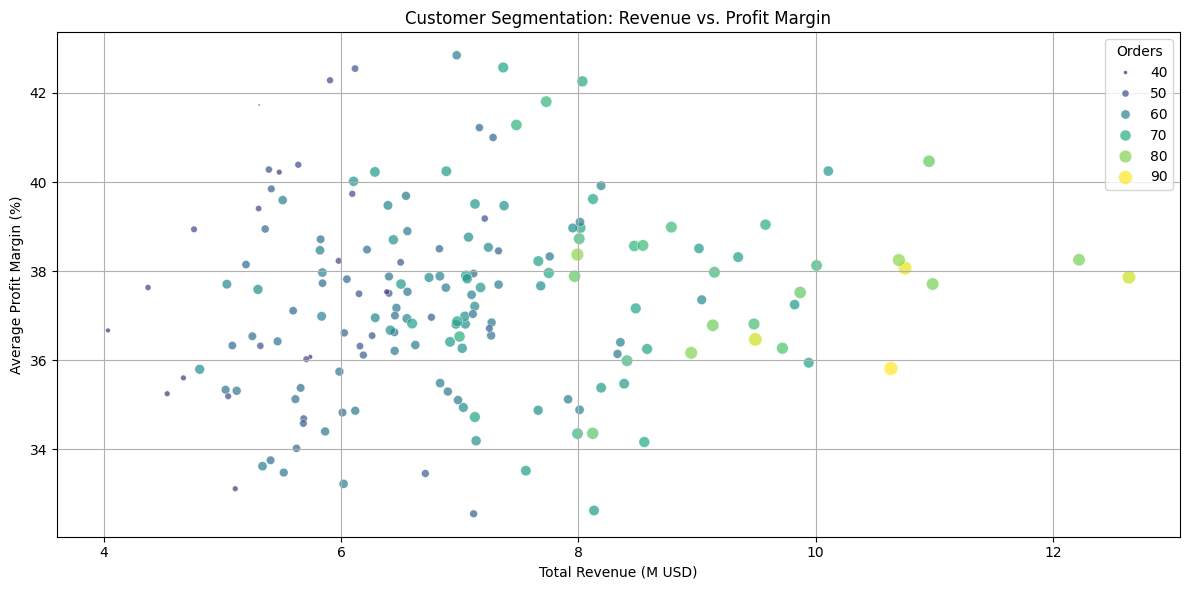

In [ ]:
plt.figure(figsize=(12,6))

sns.scatterplot(
    data=df_cust_segment,
    x='revenue_m',
    y='avg_profit_margin',
    hue='orders',
    palette='viridis',
    alpha=0.7,
    size='orders',
    sizes=(2,100)
)

plt.xlabel('Total Revenue (M USD)')
plt.ylabel('Average Profit Margin (%)')
plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.legend(title='Orders')
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
df_cust_segment.revenue_m

,revenue_m
0,7.662321
1,7.116928
2,5.835995
3,7.074074
4,12.641252
...,...
170,6.394855
171,7.175620
172,5.682109
173,6.287843


## 15. Correlation Heatmap of Numeric Features

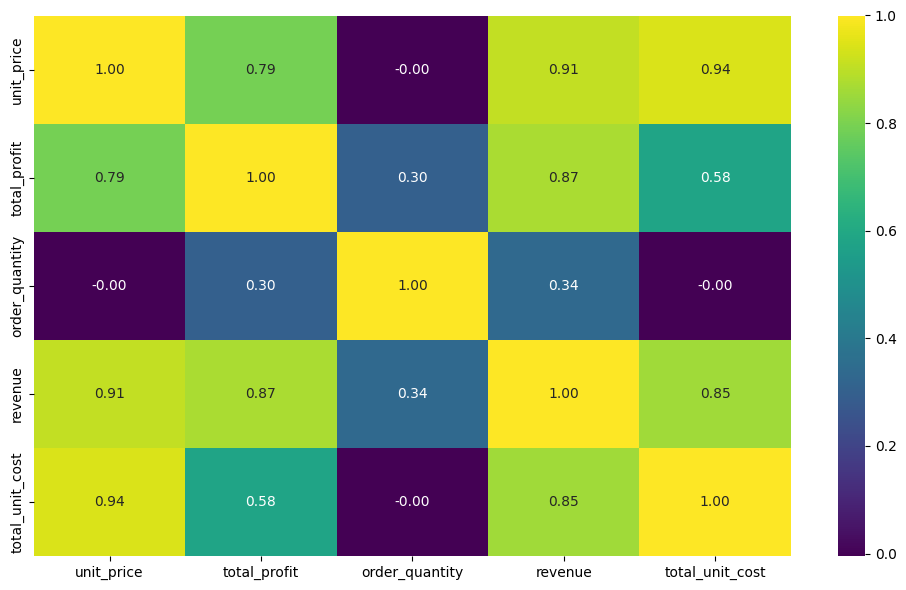

In [ ]:
# List Numeric columns to correlate
num_cols=['unit_price','total_profit','order_quantity','revenue','total_unit_cost']

# Create a correlation matrix
corr=df[num_cols].corr()


plt.figure(figsize=(10,6))

sns.heatmap(
    corr,
    annot=True,
    cmap='viridis',
    fmt='.2f'
)

plt.tight_layout()
plt.show()

In [ ]:
df.head()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state_code,...,latitude,longitude,budget,total_cost,total_profit,profit_margin_pct,order_month,month_name,month_num,order_number_int
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,2014-01,January,1,225
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,2014-01,January,1,3378
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,2014-01,January,1,5126
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,...,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,2014-01,January,1,5614
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,...,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,2014-01,January,1,5781


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_number       64104 non-null  object        
 1   order_date         64104 non-null  datetime64[ns]
 2   customer_name      64104 non-null  object        
 3   channel            64104 non-null  object        
 4   product_name       64104 non-null  object        
 5   order_quantity     64104 non-null  int64         
 6   unit_price         64104 non-null  float64       
 7   revenue            64104 non-null  float64       
 8   total_unit_cost    64104 non-null  float64       
 9   state_code         64104 non-null  object        
 10  county             64104 non-null  object        
 11  state              64104 non-null  object        
 12  region             64104 non-null  object        
 13  latitude           64104 non-null  float64       
 14  longit

In [ ]:
df.to_csv('Regional_sales_cleaned.csv',index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_number       64104 non-null  object        
 1   order_date         64104 non-null  datetime64[ns]
 2   customer_name      64104 non-null  object        
 3   channel            64104 non-null  object        
 4   product_name       64104 non-null  object        
 5   order_quantity     64104 non-null  int64         
 6   unit_price         64104 non-null  float64       
 7   revenue            64104 non-null  float64       
 8   total_unit_cost    64104 non-null  float64       
 9   state_code         64104 non-null  object        
 10  county             64104 non-null  object        
 11  state              64104 non-null  object        
 12  region             64104 non-null  object        
 13  latitude           64104 non-null  float64       
 14  longit

In [ ]:
# Before Loading the data to MySQL, Create the corresponding tables and Database in Mysql
# and make sure that the Server is running else we will get a connection error
# Loading all the tables Created Facts and Dimensions to Sql
!pip install mysql-connector-python sqlalchemy pymysql

from sqlalchemy import create_engine, text

## Connection Parameters
username = "username"
password = "passowrd"
host = "host"
port = 3306
database = "regional_sales_db"

# Create connection string
connection_str = f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}"


try:
     # Create engine
    engine = create_engine(connection_str)

     # Test the connection
    with engine.connect() as connection:
        result =connection.execute(text("SELECT 1 as test_column"))
        row=result.fetchone()
        print("Connection successful!")
        print(f"Test Query Result: {row[0]}")
except Exception as e:
    print(f"Unable to connect: {e}")





   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.9 MB/s eta 0:00:00
Unable to connect: invalid literal for int() with base 10: ':1:3306'


In [ ]:
df.to_sql('regional_sales_table', con=engine, if_exists='replace', index=False)